___

<p style = "font-family:courier;font-size:25px;">
BR35H-MASK-RCNN      
</p>

<p style = "font-family:courier;font-size:15px;">
Capstone Phase 5 Project     
</p>

<b>Name:</b> Ansel Vallejo

<i><font color = 'gray'>Source: </font></i>
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

___

#### <b> Overview </b>

<div style="text-align: justify">
In the medical field, Brain tumor is seen as a serious, abnormal growth of cells in or near the brain that can be either benign, which is non-cancerous or malignant, which is cancerous. There are many treatments an individual with such tumor can receive, such as radiation therapy, chemotherapy, therapeutic drug, etc. Brain tumor can be seen via Magnetic Resonance Imaging (MRI) scanned images. Human error is prone to occur in any industry, and because of such error in the medical field can cost a life. To detect and identify what constitutes a benign or malignant tumor without human intervention would be to build a robust deep learning model to help the medical practitioner properly classify a cancerous from noncancerous tumors using over 3000 MRI scan trained images and testing images to help better serve the model.
</div>

<b>Algorithm Implemented: </b> <i>Convolutional Neural Network</i> (Deep Learning) <br>
<b>Data type: </b> Unstructured <br>
<br>
<br>
<b>Data Classification: </b>
    <ul>
        <li><b>NO</b> (no tumor) - classified as 0</li>
        <li><b>YES</b> (yes tumor) - classified as 1</li>
    </ul>


___

### Import Libraries

In [67]:
import pandas as pd                       #Data Analysis and manipulation tool
import numpy as np                        #Scientific computing
import matplotlib.pyplot as plt           #Visualization
from matplotlib.colors import Normalize
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#Import image data
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from PIL import Image
import random
import pickle
import cv2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#KERAS
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

                                                Number of GPUs Available

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

___

### Functions 
<i>(Tools)</i>

In [37]:
def model_acc_loss(test, loss):
    print('Model Accuracy (Test data)')
    print('________________________________________')
    print('')
    print('Model Accuracy:      ', test)
    print('Test Loss:          ', loss)
    print('________________________________________')
    print('')

    return

___

### Import Data

<b> load_data </b> <i>(Function)</i>


<div style="text-align: justify">
The function is iterating through the <i>directory</i>, and <i>categories</i> defined, then classifying the data by 'yes' <b>{1}</b> or 'no' <b>{0}</b>, depending on the data folder the images are extracted from. After categorizing the data, we proceed in converting the images into grayscale, and resizing according to spec. we then append the <i>data</i> list to combine both the resized array with its respective categorical number. After the data is prepared, the data is shuffled then separated into the <i> image</i> and <i>label</i> list, followed up by reshaping the <i>image</i> variable list. Then, the data is returned and included into the <i> image </i> and <i>label</i> variables outside of the function to then be referenced and follow up with saving into a pickle file format to then be referenced when needed.
    </div>

In [48]:
#import cv2

#Empty list to store images and labels
data = []

#Folder category found in data folder
directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 64

#Function that loads the image data, categorizes images, resize, shuffles, and creates image and label lists
def load_data():
    
    for classification in categories:
        path = os.path.join(directory, classification)
        cat_num = categories.index(classification)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, cat_num])
            except Exception as e:
                pass
       
    random.shuffle(data)


    image = []
    label = []   
    for images, labels in data:
        image.append(images)
        label.append(labels)
        
    image = np.array(image)#.reshape(IMG_SIZE, IMG_SIZE)
    label = np.array(label)
    
    
    return image, label, img_array


image, label, img_array= load_data()


___

### Saving Data

 <b> Save Data</b> <i>(.pkl file extension)</i><br>


[[DESCRIPTION]]

In [49]:
pickle_out = open('image.pickle', 'wb')
pickle.dump(image, pickle_out)
pickle_out.close()
    
pickle_out = open('label.pickle', 'wb')
pickle.dump(label, pickle_out)
pickle_out.close()

In [50]:
pickle_in = open('image.pickle', 'rb')
image = pickle.load(pickle_in)

pickle_in = open('label.pickle', 'rb')
label = pickle.load(pickle_in)

___

###### <i> <font color = 'blue'> TESTING pickle_in </font> </i>

In [8]:
image[1]

array([[[38, 37, 33],
        [38, 37, 33],
        [38, 37, 33],
        ...,
        [43, 42, 38],
        [41, 40, 36],
        [ 9,  8,  4]],

       [[38, 37, 33],
        [38, 37, 33],
        [38, 37, 33],
        ...,
        [43, 42, 38],
        [40, 38, 35],
        [ 7,  6,  3]],

       [[36, 35, 31],
        [36, 35, 31],
        [36, 35, 31],
        ...,
        [41, 40, 36],
        [39, 39, 35],
        [ 8,  7,  3]],

       ...,

       [[40, 39, 35],
        [40, 39, 35],
        [40, 39, 35],
        ...,
        [42, 41, 37],
        [39, 39, 35],
        [ 8,  7,  3]],

       [[40, 39, 35],
        [40, 39, 35],
        [40, 39, 35],
        ...,
        [42, 41, 37],
        [40, 39, 35],
        [ 8,  7,  3]],

       [[40, 39, 35],
        [40, 39, 35],
        [40, 39, 35],
        ...,
        [42, 41, 37],
        [40, 38, 35],
        [ 8,  7,  3]]], dtype=uint8)

___

<b> plot_images_5_5</b> <i>(Function)</i><br>

<div style="text-align: justify">
The function creates a 5x5 grid of subplots using the subplots() function. It then loops through each subplot and resizes the corresponding image using the resize() function from OpenCV. It then displays the image in the subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the set_title() function from matplotlib. The x and y ticks are removed from each subplot using the set_xticks() and set_yticks() functions from matplotlib.
    </div>

In [9]:
def plot_images_5_5():
    
    
    fig, axs = plt.subplots(5, 5)

    for i in range(len(axs)):
        for j in range(len(axs[i])):
            new_array = cv2.resize(image[i*len(axs[i])+j], (IMG_SIZE, IMG_SIZE))
            axs[i][j].imshow(new_array, cmap='gray')
            axs[i][j].set_title(categories[label[i*len(axs[i])+j]])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            
            
    plt.tight_layout()
    plt.show()

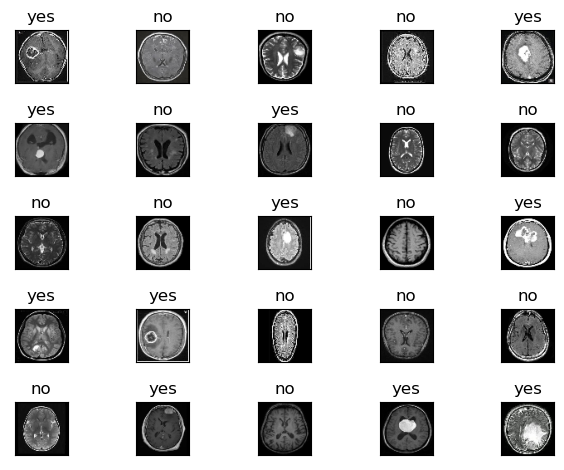

In [10]:
plot_images_5_5()

___

<b>plot_images_2_3</b> <i>(Function)</i>

<div style="text-align: justify">
The function loops through the first 6 images in the image list and creates a 2x3 grid of subplots using the subplot() function. It then displays the corresponding image in each subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the title() function from matplotlib. The x and y ticks are removed from each subplot using the xticks() and yticks() functions from matplotlib.
    </div>

In [11]:
def plot_images_2_3():
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(image[i])
        plt.title(categories[label[i]])
        plt.xticks([])
        plt.yticks([])

    plt.show()

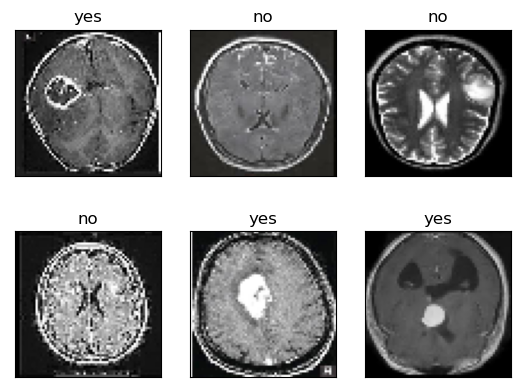

In [12]:
plot_images_2_3()

___

___

### <font size = '4'> <b> DISPLAY IMAGE BY IMAGE SIZE </b></font>

<b><i> <font color = 'purple'> (1 x 3) </font> </i></b>

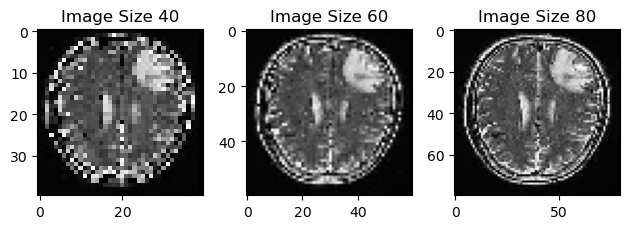

In [13]:
fig, axs = plt.subplots(1, 3)

directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 40

for i in range(len(axs)):
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    axs[i].imshow(new_array, cmap='gray')
    axs[i].set_title(f'Image Size {IMG_SIZE}')
    IMG_SIZE += 20

plt.tight_layout()
plt.show()

<b><i> <font color = 'purple'> (3 x 3) </font> </i></b>

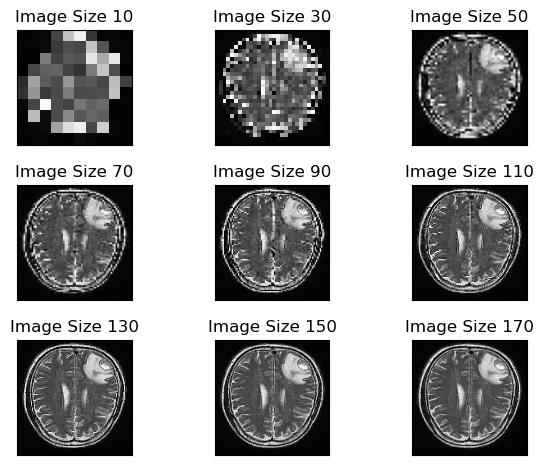

In [14]:
fig, axs = plt.subplots(3, 3)

IMG_SIZE = 10

for i in range(len(axs)):
    for j in range(len(axs)):
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        axs[i, j].imshow(new_array, cmap='gray')
        axs[i, j].set_title(f'Image Size {IMG_SIZE}')
        IMG_SIZE += 20

for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
        
plt.tight_layout()
plt.show()

___

___

### Train Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(image, 
                                                    label, 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [62]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


In [53]:
X_train = normalize(X_train, axis =1)
X_test = normalize(X_test, axis =1)

___

### <b> Sequential Model </b>

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

################################################################################
################################################################################

<i>Tuning Paramenters</i>

In [76]:
##############(Image Size)###############
batch_size = 32

#########################################


##############(Batch Size)###############
batch_size = 32

#########################################

################(Epoch)##################
epoch = 50

#########################################


###########(Exponential Decay)###########
# Learning rate schedule parameters
initial_lr = 0.001
decay_steps = 1000
decay_rate = 0.96
#########################################



############(ImageGenerator)############
# Parameters used in ImageGenerator
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
#########################################



In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



# LEARNING RATE SCHEDULE (ExponentialDecay)
# MODIFICATIONS CAN BE MADE IN THE TUNING PARAMETERS SECTION ABOVE
learning_rate = ExponentialDecay(initial_learning_rate=initial_lr, decay_steps=decay_steps, decay_rate=decay_rate)
optimizer = Adam(learning_rate=learning_rate)


# AUGMENTATION (ImageDataGenerator)
# MODIFICATIONS CAN BE MADE IN THE TUNING PARAMETERS SECTION ABOVE
datagen = ImageDataGenerator(
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    fill_mode=fill_mode
)

# Compile
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Run model (Augmented version)
results_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                              validation_data=(X_train, y_train), 
                              verbose=1, 
                              shuffle=False, 
                              epochs=epoch)

# Save model (Augmented version)
model.save('brain_tumor_50_epochs_augmented_v8.h5')


sigmoid_loss = results_augmented.history['loss']
sigmoid_accuracy = results_augmented.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results_augmented.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

train_loss = results_augmented.history['loss']
train_acc = results_augmented.history['accuracy']
val_loss = results_augmented.history['val_loss']
val_acc = results_augmented.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results_augmented.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results_augmented.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results_augmented.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [74]:
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
# print(y_pred)


# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

19/19 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       306
           1       0.93      0.97      0.95       294

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



<b><font color='red'> EXECUTE </font></b>

In [56]:
results = model.fit(X_train, y_train, batch_size = 16, 
          verbose=1, 
          epochs=100,
          validation_data= (X_train, y_train),
          shuffle = False)

model.save('brain_tumor_100epochs_v4.5')

Epoch 1/100
150/150 [==============================] - 7s 45ms/step - loss: 0.5556 - accuracy: 0.7242 - val_loss: 0.4895 - val_accuracy: 0.7821
Epoch 2/100
150/150 [==============================] - 7s 45ms/step - loss: 0.4215 - accuracy: 0.8200 - val_loss: 0.3150 - val_accuracy: 0.8687
Epoch 3/100
150/150 [==============================] - 7s 45ms/step - loss: 0.2984 - accuracy: 0.8783 - val_loss: 0.1997 - val_accuracy: 0.9333
Epoch 4/100
150/150 [==============================] - 7s 46ms/step - loss: 0.2233 - accuracy: 0.9150 - val_loss: 0.1320 - val_accuracy: 0.9521
Epoch 5/100
150/150 [==============================] - 7s 48ms/step - loss: 0.1573 - accuracy: 0.9421 - val_loss: 0.0754 - val_accuracy: 0.9746
Epoch 6/100
150/150 [==============================] - 7s 48ms/step - loss: 0.1138 - accuracy: 0.9575 - val_loss: 0.0505 - val_accuracy: 0.9862
Epoch 7/100
150/150 [==============================] - 7s 48ms/step - loss: 0.0867 - accuracy: 0.9712 - val_loss: 0.0292 - val_accuracy:

150/150 [==============================] - 8s 51ms/step - loss: 0.0458 - accuracy: 0.9875 - val_loss: 9.1759e-04 - val_accuracy: 0.9996
Epoch 57/100
150/150 [==============================] - 8s 52ms/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 1.0380e-04 - val_accuracy: 1.0000
Epoch 58/100
150/150 [==============================] - 8s 52ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 5.0666e-05 - val_accuracy: 1.0000
Epoch 59/100
150/150 [==============================] - 8s 51ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 2.3695e-05 - val_accuracy: 1.0000
Epoch 60/100
150/150 [==============================] - 8s 51ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 3.7909e-04 - val_accuracy: 1.0000
Epoch 61/100
150/150 [==============================] - 8s 53ms/step - loss: 3.4233e-04 - accuracy: 1.0000 - val_loss: 1.7969e-05 - val_accuracy: 1.0000
Epoch 62/100
150/150 [==============================] - 8s 52ms/step - loss: 5.3856e-04 - accuracy: 1.0000 - val_lo

INFO:tensorflow:Assets written to: brain_tumor_100epochs_v4.5\assets


INFO:tensorflow:Assets written to: brain_tumor_100epochs_v4.5\assets


___

### <b>Data Augmentation</b> <i>(Using ImageDataGenerator)</i>

In [24]:
#Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

<b><font color='red'> EXECUTE </font></b> <i>(with Augmentation)</i>

In [25]:
#Run model (Augmented version)
results_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                              validation_data= (X_train, y_train), 
                              verbose=1, 
                              shuffle = False, 
                              epochs=500)

#Save model (Augmented version)
model.save('brain_tumor_500_epochs_augmented_v3.h5')

Epoch 1/500
75/75 [==============================] - 8s 97ms/step - loss: 0.6753 - accuracy: 0.5758 - val_loss: 0.6871 - val_accuracy: 0.5471
Epoch 2/500
75/75 [==============================] - 7s 99ms/step - loss: 0.6478 - accuracy: 0.6196 - val_loss: 0.6679 - val_accuracy: 0.5933
Epoch 3/500
75/75 [==============================] - 9s 119ms/step - loss: 0.6269 - accuracy: 0.6617 - val_loss: 0.6397 - val_accuracy: 0.6358
Epoch 4/500
75/75 [==============================] - 13s 168ms/step - loss: 0.6061 - accuracy: 0.6825 - val_loss: 0.5642 - val_accuracy: 0.7113
Epoch 5/500
75/75 [==============================] - 9s 123ms/step - loss: 0.6020 - accuracy: 0.6808 - val_loss: 0.5123 - val_accuracy: 0.7621
Epoch 6/500
75/75 [==============================] - 11s 142ms/step - loss: 0.5971 - accuracy: 0.6946 - val_loss: 0.5247 - val_accuracy: 0.7513
Epoch 7/500
75/75 [==============================] - 10s 129ms/step - loss: 0.5819 - accuracy: 0.6996 - val_loss: 0.5094 - val_accuracy: 0.770

Epoch 58/500
75/75 [==============================] - 8s 103ms/step - loss: 0.2060 - accuracy: 0.9212 - val_loss: 0.1163 - val_accuracy: 0.9592
Epoch 59/500
75/75 [==============================] - 8s 105ms/step - loss: 0.1960 - accuracy: 0.9267 - val_loss: 0.1196 - val_accuracy: 0.9471
Epoch 60/500
75/75 [==============================] - 8s 103ms/step - loss: 0.1820 - accuracy: 0.9358 - val_loss: 0.1351 - val_accuracy: 0.9433
Epoch 61/500
75/75 [==============================] - 8s 102ms/step - loss: 0.1873 - accuracy: 0.9304 - val_loss: 0.1270 - val_accuracy: 0.9529
Epoch 62/500
75/75 [==============================] - 8s 104ms/step - loss: 0.1899 - accuracy: 0.9317 - val_loss: 0.1251 - val_accuracy: 0.9500
Epoch 63/500
75/75 [==============================] - 8s 104ms/step - loss: 0.1675 - accuracy: 0.9404 - val_loss: 0.1562 - val_accuracy: 0.9408
Epoch 64/500
75/75 [==============================] - 8s 106ms/step - loss: 0.1798 - accuracy: 0.9329 - val_loss: 0.0952 - val_accuracy:

Epoch 115/500
75/75 [==============================] - 8s 108ms/step - loss: 0.1209 - accuracy: 0.9550 - val_loss: 0.0833 - val_accuracy: 0.9717
Epoch 116/500
75/75 [==============================] - 8s 107ms/step - loss: 0.1220 - accuracy: 0.9546 - val_loss: 0.0715 - val_accuracy: 0.9733
Epoch 117/500
75/75 [==============================] - 8s 108ms/step - loss: 0.1249 - accuracy: 0.9529 - val_loss: 0.0609 - val_accuracy: 0.9771
Epoch 118/500
75/75 [==============================] - 8s 106ms/step - loss: 0.1015 - accuracy: 0.9629 - val_loss: 0.0774 - val_accuracy: 0.9712
Epoch 119/500
75/75 [==============================] - 8s 105ms/step - loss: 0.1104 - accuracy: 0.9604 - val_loss: 0.0591 - val_accuracy: 0.9783
Epoch 120/500
75/75 [==============================] - 8s 105ms/step - loss: 0.1011 - accuracy: 0.9625 - val_loss: 0.1192 - val_accuracy: 0.9608
Epoch 121/500
75/75 [==============================] - 8s 106ms/step - loss: 0.1129 - accuracy: 0.9588 - val_loss: 0.0484 - val_ac

75/75 [==============================] - 8s 102ms/step - loss: 0.1021 - accuracy: 0.9658 - val_loss: 0.0461 - val_accuracy: 0.9825
Epoch 172/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.0362 - val_accuracy: 0.9862
Epoch 173/500
75/75 [==============================] - 8s 102ms/step - loss: 0.0850 - accuracy: 0.9721 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 174/500
75/75 [==============================] - 8s 104ms/step - loss: 0.1017 - accuracy: 0.9646 - val_loss: 0.0705 - val_accuracy: 0.9733
Epoch 175/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0851 - accuracy: 0.9679 - val_loss: 0.0537 - val_accuracy: 0.9812
Epoch 176/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0721 - accuracy: 0.9742 - val_loss: 0.0449 - val_accuracy: 0.9825
Epoch 177/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0831 - accuracy: 0.9717 - val_loss: 0.0686 - val_accuracy: 0.9746

75/75 [==============================] - 8s 106ms/step - loss: 0.0685 - accuracy: 0.9767 - val_loss: 0.0527 - val_accuracy: 0.9800
Epoch 228/500
75/75 [==============================] - 8s 105ms/step - loss: 0.0784 - accuracy: 0.9733 - val_loss: 0.0205 - val_accuracy: 0.9942
Epoch 229/500
75/75 [==============================] - 8s 105ms/step - loss: 0.0653 - accuracy: 0.9771 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 230/500
75/75 [==============================] - 8s 107ms/step - loss: 0.0673 - accuracy: 0.9737 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 231/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0721 - accuracy: 0.9754 - val_loss: 0.0243 - val_accuracy: 0.9933
Epoch 232/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0630 - accuracy: 0.9787 - val_loss: 0.0369 - val_accuracy: 0.9846
Epoch 233/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0606 - accuracy: 0.9792 - val_loss: 0.0204 - val_accuracy: 0.9925

75/75 [==============================] - 8s 104ms/step - loss: 0.0499 - accuracy: 0.9837 - val_loss: 0.0244 - val_accuracy: 0.9917
Epoch 284/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.0217 - val_accuracy: 0.9912
Epoch 285/500
75/75 [==============================] - 8s 102ms/step - loss: 0.0596 - accuracy: 0.9804 - val_loss: 0.0150 - val_accuracy: 0.9946
Epoch 286/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0531 - accuracy: 0.9804 - val_loss: 0.0119 - val_accuracy: 0.9954
Epoch 287/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.3009 - val_accuracy: 0.9354
Epoch 288/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0501 - accuracy: 0.9825 - val_loss: 0.0614 - val_accuracy: 0.9821
Epoch 289/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0504 - accuracy: 0.9867 - val_loss: 0.0525 - val_accuracy: 0.9821

75/75 [==============================] - 8s 103ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0153 - val_accuracy: 0.9962
Epoch 340/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0469 - accuracy: 0.9837 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 341/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0324 - accuracy: 0.9887 - val_loss: 0.0082 - val_accuracy: 0.9962
Epoch 342/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0552 - accuracy: 0.9850 - val_loss: 0.0854 - val_accuracy: 0.9696
Epoch 343/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0394 - val_accuracy: 0.9862
Epoch 344/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0537 - accuracy: 0.9808 - val_loss: 0.0725 - val_accuracy: 0.9804
Epoch 345/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0452 - accuracy: 0.9833 - val_loss: 0.0183 - val_accuracy: 0.9942

75/75 [==============================] - 8s 103ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0116 - val_accuracy: 0.9962
Epoch 396/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.0399 - val_accuracy: 0.9867
Epoch 397/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0133 - val_accuracy: 0.9962
Epoch 398/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0258 - accuracy: 0.9887 - val_loss: 0.0345 - val_accuracy: 0.9875
Epoch 399/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0308 - accuracy: 0.9883 - val_loss: 0.0382 - val_accuracy: 0.9842
Epoch 400/500
75/75 [==============================] - 8s 103ms/step - loss: 0.0615 - accuracy: 0.9808 - val_loss: 0.0367 - val_accuracy: 0.9858
Epoch 401/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0442 - accuracy: 0.9875 - val_loss: 0.0185 - val_accuracy: 0.9933

75/75 [==============================] - 8s 109ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0454 - val_accuracy: 0.9862
Epoch 452/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0743 - val_accuracy: 0.9787
Epoch 453/500
75/75 [==============================] - 8s 106ms/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.0146 - val_accuracy: 0.9942
Epoch 454/500
75/75 [==============================] - 8s 107ms/step - loss: 0.0527 - accuracy: 0.9817 - val_loss: 0.1084 - val_accuracy: 0.9717
Epoch 455/500
75/75 [==============================] - 8s 108ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 456/500
75/75 [==============================] - 8s 108ms/step - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.0094 - val_accuracy: 0.9975
Epoch 457/500
75/75 [==============================] - 8s 109ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0171 - val_accuracy: 0.9929

___

<b> Evaluate model against the test data</b>

In [57]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 16ms/step - loss: 0.2514 - accuracy: 0.9783


In [58]:
model_acc_loss(test_acc, test_loss)

Model Accuracy (Test data)
________________________________________

Model Accuracy:       0.9783333539962769
Test Loss:           0.2514435052871704
________________________________________



___

<i>Summary</i>

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

In [42]:
results.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1c9d8a470d0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5490754842758179,
   0.42540547251701355,
   0.31456440687179565,
   0.22132433950901031,
   0.16236194968223572,
   0.11021943390369415,
   0.0695020854473114,
   0.05887587368488312,
   0.03215130791068077,
   0.025531752035021782],
  'accuracy': [0.7233333587646484,
   0.809166669845581,
   0.8700000047683716,
   0.909583330154419,
   0.9454166889190674,
   0.9641666412353516,
   0.9791666865348816,
   0.9829166531562805,
   0.9920833110809326,
   0.9929166436195374],
  'val_loss': [0.4515177011489868,
   0.31613463163375854,
   0.2116173654794693,
   0.15402743220329285,
   0.09838595241308212,
   0.05772896483540535,
   0.0352964885532856,
   0.025901062414050102,
   0.019818419590592384,
   0.009129732847213745],
  'val_accuracy': [0.7929166555404663,
   0.8704166412353516,
   0.9045833349227905,
   0.94125002

### <b><font size = '5' color = 'green'> MODEL EVALUATION (with AUGMENTATION) </font></b>

<i> Evaluation </i>

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 34ms/step - loss: 0.0810 - accuracy: 0.9800


<i> Model Accuracy and Test Loss </i>

In [38]:
model_acc_loss(test_acc, test_loss)

Model Accuracy (Test data)
________________________________________

Model Accuracy:       0.9800000190734863
Test Loss:           0.08096947520971298
________________________________________



<i>Attribute and values</i>

In [28]:
results_augmented.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x16e0e5022e0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6753212809562683,
   0.6478011012077332,
   0.6269063353538513,
   0.6061310768127441,
   0.6020047664642334,
   0.597112238407135,
   0.5818744897842407,
   0.5740976333618164,
   0.5677558779716492,
   0.5801303386688232,
   0.5524659752845764,
   0.5446001887321472,
   0.5423131585121155,
   0.5261513590812683,
   0.5086605548858643,
   0.4806669056415558,
   0.4605681300163269,
   0.4338361620903015,
   0.423114150762558,
   0.4380134046077728,
   0.438005268573761,
   0.4100959897041321,
   0.3702140748500824,
   0.3764950931072235,
   0.35320189595222473,
   0.3603604733943939,
   0.3238241374492645,
   0.32773640751838684,
   0.31095102429389954,
   0.30320921540260315,
   0.3389776647090912,
   0.32020601630210876,
   0.3086368441581726,
   0.29359883069992065,
   0.2757415175437927,
   0.26882022619247437,


<i><font color = 'blue'>Accuracy and Loss Plot </font></i>

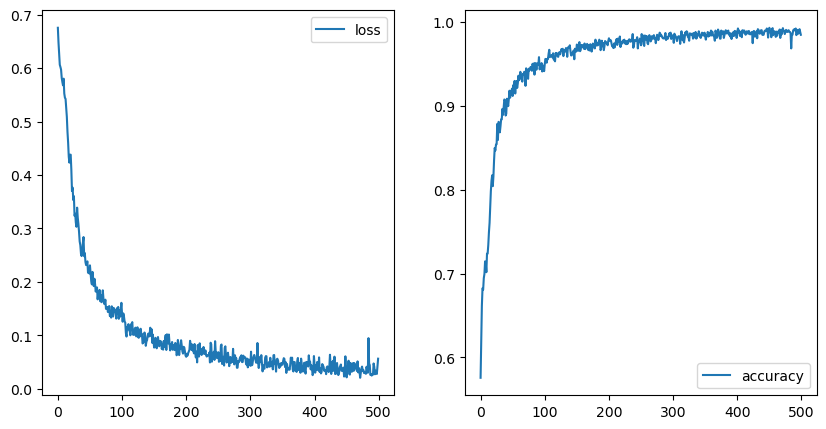

In [59]:
sigmoid_loss = results_augmented.history['loss']
sigmoid_accuracy = results_augmented.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results_augmented.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

### Evaluate Model

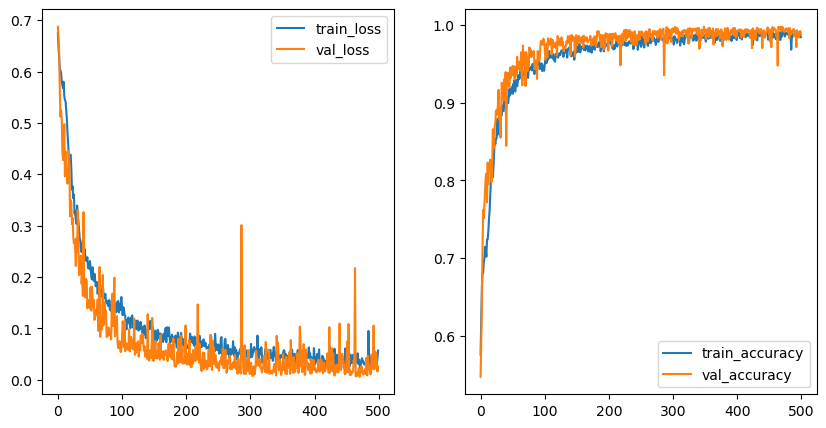

In [60]:
train_loss = results_augmented.history['loss']
train_acc = results_augmented.history['accuracy']
val_loss = results_augmented.history['val_loss']
val_acc = results_augmented.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results_augmented.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results_augmented.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results_augmented.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [143]:
pred_tumor_list = list_dir(pred_tumor)
for i in range(len(pred_tumor_list)):
    pred_tumor_list[i] = pred_tumor + img_dir + pred_tumor_list[i]

In [63]:
# testing_predictions = model.predict(X_test)
# #y_pred = model.predict(X_test)
# print(classification_report(y_test,testing_predictions))
# print(testing_predictions)

# #print(y_pred)

y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
# print(y_pred)


# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

19/19 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       306
           1       0.98      0.98      0.98       294

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



<b> Get all the data in the directory data/validation (Train: 500 images) (Test: 100 images), and reshape them </b>

#### <b><font color = 'red'>LOAD THE DATA</font> </b>

In [340]:
df_list = list(yes_no_df['path'].astype(str))

In [317]:
def load_images_from_directory(train_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#     validation_generator = test_datagen.flow_from_directory(
#         val_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

#     predict_generator = test_datagen.flow_from_directory(
#         pred_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode=None,
#         shuffle=False)

    return train_generator #, validation_generator, predict_generator

In [348]:
load_images_from_directory('data/')

Found 0 images belonging to 0 classes.


In [ ]:


train_img_dir = 'Br35H-Mask-RCNN/VAL/'
test_img_dir = 'Br35H-Mask-RCNN/TEST/'

In [82]:
train_generator = ImageDataGenerator().flow_from_directory(
    train_img_dir,
    target_size= (256, 256),
    batch_size = 500)

Found 0 images belonging to 0 classes.


In [83]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_img_dir,
    target_size= (256, 256),
    batch_size = 100)

Found 0 images belonging to 0 classes.


In [35]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

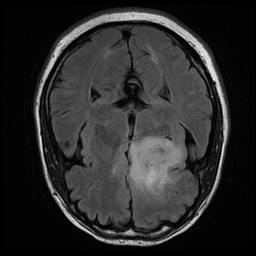

In [36]:
array_to_img(train_images[10])

<b> Transform the matrix </b>

Train

In [38]:
train_img_unrow = train_images.reshape(500, -1).T

In [39]:
np.shape(train_img_unrow)

(196608, 500)

Test

In [40]:
m = 100
test_img_unrow = test_images.reshape(m, -1).T

In [41]:
np.shape(test_img_unrow)

(196608, 100)

Class Indices

In [43]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [44]:
train_labels_final = train_labels.T[[1]]

In [45]:
np.shape(train_labels_final)

(1, 500)

In [46]:
test_labels_final = test_labels.T[[1]]

In [47]:
np.shape(test_labels_final)

(1, 100)

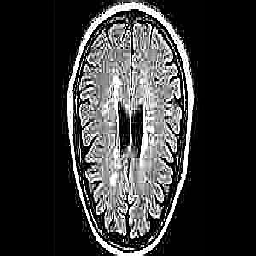

In [48]:
array_to_img(train_images[240])

In [49]:
train_labels_final[:,240]

array([0.], dtype=float32)

### Data Standardization

In [50]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

### Logistic Regression-based Neural Network

<b> Initialize b </b>

In [51]:
b = 0

<b> Initialize w </b>

In [52]:
def init_w(n):
    w = np.zeros((n,1))
    return w

In [56]:
w = init_w(256*256*3)

<b> Forward Propagation </b>

In [57]:
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [58]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [59]:
print(dw)

print(db)

print(cost)

[[-0.00364706]
 [-0.00269804]
 [-0.0033451 ]
 ...
 [-0.01177647]
 [-0.01160784]
 [-0.01128235]]
-0.002
0.6931471805599454


<b> Optimization </b>

In [60]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [61]:
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.521153
Cost after iteration 100: 0.454500
Cost after iteration 150: 0.411769


<b> Label Predictions </b>

In [62]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [63]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

<b> Overall Model </b>

In [64]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [65]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 1.428492
Cost after iteration 100: 0.232415
Cost after iteration 150: 0.082094
Cost after iteration 200: 0.037336
Cost after iteration 250: 0.024759
Cost after iteration 300: 0.017805
Cost after iteration 350: 0.013923
Cost after iteration 400: 0.011646
Cost after iteration 450: 0.010154
Cost after iteration 500: 0.009082
Cost after iteration 550: 0.008264
Cost after iteration 600: 0.007614
Cost after iteration 650: 0.007081
Cost after iteration 700: 0.006633
Cost after iteration 750: 0.006250
Cost after iteration 800: 0.005917
Cost after iteration 850: 0.005625
Cost after iteration 900: 0.005366
Cost after iteration 950: 0.005134
Cost after iteration 1000: 0.004925
Cost after iteration 1050: 0.004735
Cost after iteration 1100: 0.004562
Cost after iteration 1150: 0.004403
Cost after iteration 1200: 0.004256
Cost after iteration 1250: 0.004121
Cost after iteration 1300: 0.003995
Cost after iteration 1350: 0.003877
Cost after iteration 1400: 0.003768
Cost after i